In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [6]:
#postive comments
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [7]:
#negative comments 
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<AxesSubplot:>

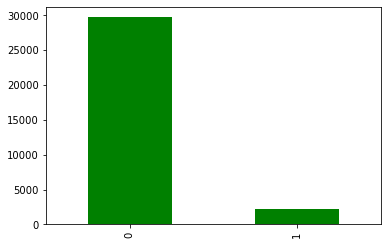

In [8]:
train['label'].value_counts().plot.bar(color = 'green', figsize = (6, 4))

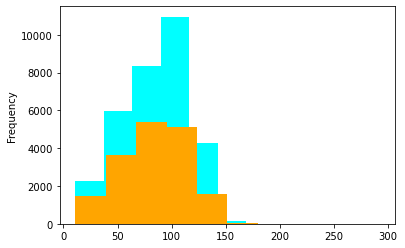

In [9]:
length_train = train['tweet'].str.len().plot.hist(color = 'cyan', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [10]:
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [11]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
cv = CountVectorizer(stop_words = 'english', max_features = 2500)
words = cv.fit_transform(train.tweet)

In [15]:
sum_words = words.sum(axis=0)
sum_words

matrix([[ 51,  28,  58, ...,  26,  22, 272]], dtype=int64)

In [16]:
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq

[('user', 17577),
 ('father', 635),
 ('kids', 204),
 ('run', 107),
 ('thanks', 310),
 ('credit', 14),
 ('use', 114),
 ('cause', 73),
 ('don', 665),
 ('offer', 27),
 ('bihday', 845),
 ('model', 376),
 ('love', 2749),
 ('time', 1136),
 ('urð', 325),
 ('society', 27),
 ('motivation', 174),
 ('huge', 44),
 ('fan', 67),
 ('big', 197),
 ('talking', 67),
 ('leave', 136),
 ('pay', 280),
 ('camping', 17),
 ('tomorrow', 437),
 ('school', 197),
 ('year', 332),
 ('exams', 19),
 ('think', 409),
 ('hate', 240),
 ('imagine', 30),
 ('girl', 372),
 ('won', 176),
 ('land', 31),
 ('cavs', 37),
 ('cleveland', 28),
 ('welcome', 64),
 ('ireland', 33),
 ('consumer', 13),
 ('price', 30),
 ('index', 20),
 ('mom', 127),
 ('previous', 42),
 ('blog', 385),
 ('silver', 305),
 ('gold', 316),
 ('forex', 265),
 ('orlando', 418),
 ('orlandoshooting', 59),
 ('heabreaking', 27),
 ('daddy', 92),
 ('today', 1079),
 ('cnn', 23),
 ('calls', 27),
 ('middle', 25),
 ('build', 21),
 ('wall', 24),
 ('tcot', 20),
 ('comment', 29)

In [17]:
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
words_freq

[('user', 17577),
 ('love', 2749),
 ('day', 2311),
 ('amp', 1776),
 ('happy', 1686),
 ('just', 1365),
 ('time', 1136),
 ('life', 1131),
 ('today', 1079),
 ('like', 1050),
 ('new', 997),
 ('thankful', 946),
 ('positive', 931),
 ('people', 874),
 ('good', 867),
 ('bihday', 845),
 ('smile', 712),
 ('don', 665),
 ('want', 649),
 ('father', 635),
 ('work', 611),
 ('healthy', 604),
 ('weekend', 597),
 ('fun', 588),
 ('summer', 560),
 ('make', 550),
 ('got', 531),
 ('family', 528),
 ('friday', 523),
 ('best', 516),
 ('beautiful', 515),
 ('great', 515),
 ('need', 510),
 ('way', 510),
 ('friends', 505),
 ('bull', 504),
 ('going', 492),
 ('days', 489),
 ('really', 476),
 ('wait', 465),
 ('music', 463),
 ('morning', 453),
 ('world', 449),
 ('tomorrow', 437),
 ('know', 434),
 ('week', 433),
 ('sad', 426),
 ('cute', 426),
 ('orlando', 418),
 ('think', 409),
 ('fathersday', 409),
 ('right', 394),
 ('feel', 390),
 ('happiness', 389),
 ('trump', 388),
 ('blog', 385),
 ('home', 379),
 ('sunday', 378),


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

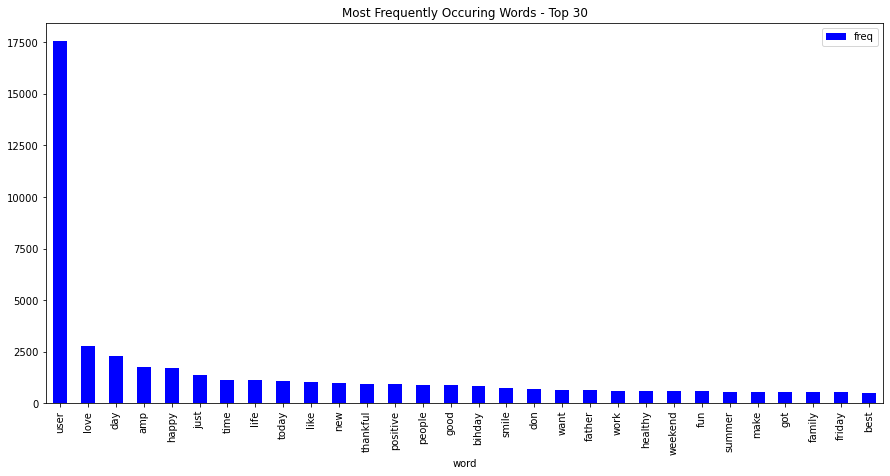

In [18]:
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [19]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda




Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

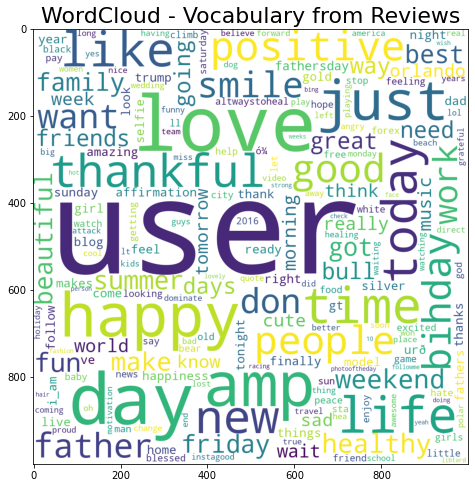

In [20]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [21]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])
normal_words

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦ the next school year is the year for exams.ð\x9f\x98¯ can\'t think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   â\x86\x9d #ireland consumer price index (mom) climbed from pre

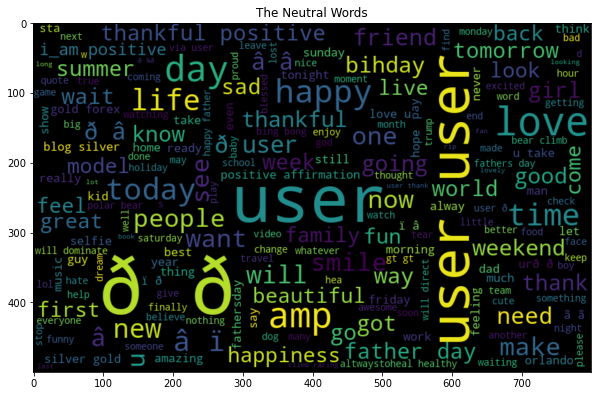

In [22]:
wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('The Neutral Words')
plt.show()

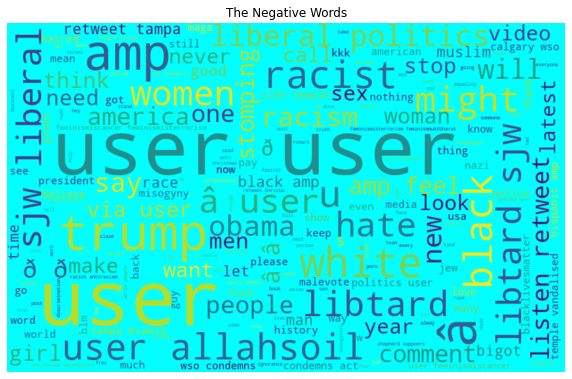

In [23]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [24]:
# collecting the hashtags
import re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [25]:
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])
HT_regular

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['80days', 'gettingfed'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 ['friday', 'cookies'],
 [],
 ['euro2016'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'

In [26]:
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])
HT_regular

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 '80days',
 'gettingfed',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro2016',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1

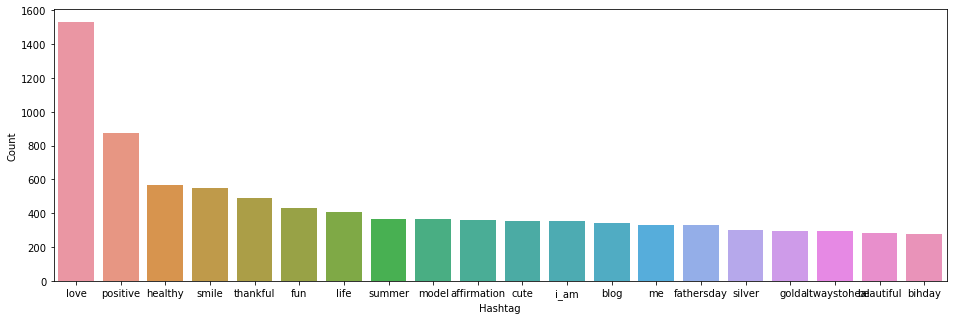

In [27]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
    
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

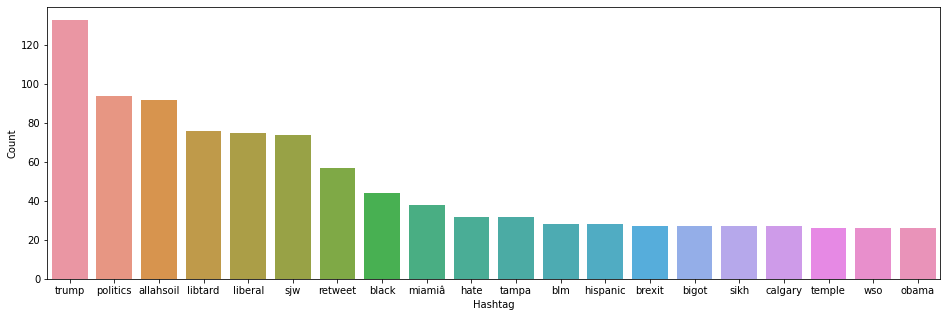

In [28]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
    
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [42]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91701\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
import string
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [44]:
transform_text("text is the one thing")

'text one thing'

In [45]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
train_corpus = []
for i in range(0,31962):
    transformed_text = transform_text(train['tweet'][i])
    train_corpus.append(transformed_text)
train_corpus

['user father dysfunct selfish drag kid dysfunct run',
 'user user thank lyft credit ca use caus offer wheelchair van pdx disapoint getthank',
 'bihday majesti',
 'model love u take u time',
 'factsguid societi motiv',
 'huge fan fare big talk leav chao pay disput get allshowandnogo',
 'user camp tomorrow user user user user user user user',
 'next school year year ca think school exam hate imagin actorslif revolutionschool girl',
 'love land allin cav champion cleveland clevelandcavali',
 'user user welcom gr8',
 'ireland consum price index mom climb previou may blog silver gold forex',
 'selfish orlando standwithorlando pulseshoot orlandoshoot biggerproblem selfish heabreak valu love',
 'get see daddi today 80day gettingf',
 'user cnn call michigan middl school wall chant tcot',
 'comment australia opkillingbay seashepherd helpcovedolphin thecov helpcovedolphin',
 'ouch junior got7 junior yugyoem omg',
 'thank paner thank posit',
 'retweet agre',
 'friday smile around via ig user use

In [47]:
test_corpus = []
for i in range(0, 17197):
    transformed_text = transform_text(test['tweet'][i])
    test_corpus.append(transformed_text)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [49]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [50]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [51]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler(with_mean=False)

# x_train = sc.fit_transform(x_train)
# x_valid = sc.transform(x_valid)
# x_test = sc.transform(x_test)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

print(classification_report(y_valid, y_pred))

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9503191089976223
F1 score : 0.6026026026026026
[[7293  139]
 [ 258  301]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7432
           1       0.68      0.54      0.60       559

    accuracy                           0.95      7991
   macro avg       0.82      0.76      0.79      7991
weighted avg       0.95      0.95      0.95      7991



In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

print("f1 score :", f1_score(y_valid, y_pred))

cm = confusion_matrix(y_valid, y_pred)
print(cm)

print(classification_report(y_valid, y_pred))

C:\Users\91701\Downloads\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.9669600767594176
Validation Accuracy : 0.9541984732824428
f1 score : 0.5869074492099323
[[7365   67]
 [ 299  260]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      7432
           1       0.80      0.47      0.59       559

    accuracy                           0.95      7991
   macro avg       0.88      0.73      0.78      7991
weighted avg       0.95      0.95      0.95      7991



In [54]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

print("f1 score :", f1_score(y_valid, y_pred))

cm = confusion_matrix(y_valid, y_pred)
print(cm)

print(classification_report(y_valid, y_pred))

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9306720060067576
f1 score : 0.5199306759098786
[[7137  295]
 [ 259  300]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7432
           1       0.50      0.54      0.52       559

    accuracy                           0.93      7991
   macro avg       0.73      0.75      0.74      7991
weighted avg       0.93      0.93      0.93      7991



In [55]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

print("f1 score :", f1_score(y_valid, y_pred))

cm = confusion_matrix(y_valid, y_pred)
print(cm)

print(classification_report(y_valid, y_pred))

Training Accuracy : 0.9729673355304326
Validation Accuracy : 0.9535727693655363
f1 score : 0.5225225225225225
[[7417   15]
 [ 356  203]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      7432
           1       0.93      0.36      0.52       559

    accuracy                           0.95      7991
   macro avg       0.94      0.68      0.75      7991
weighted avg       0.95      0.95      0.94      7991



In [2]:
from sklearn.model_selection import GridSearchCV
clf = SVC()
grid = {'C': [0.1, 1, 10, 100],
       'gamma': [1e-3, 5e-4, 1e-4, 0.1],
       }
abc = GridSearchCV(clf, grid)
abc.fit(x_train, y_train)
abc.best_estimator_

SVC(C=10.0, gamma=0.1)


In [56]:
import pickle
pickle.dump(model, open("Tweety.pkl", "wb"))
pickle.dump(cv,open('vectorizer.pkl','wb'))